In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorboard as tb

sns.set_theme(style="darkgrid")

In [2]:
id_dict = {
    'No actions alpha': 'UJocbPTnTBudls2BF97OKQ',
    'Full state alpha': 'dJ9B5l9mSVK8I6arzvTnfQ',
    'Repeat actions alpha': 'mxv6xTegRjmAAb1c2YH6tA',
    'No shaping alpha': '3nEAsO4lTnWgi4Nqge70jA'
}

In [3]:
if not os.path.exists('No actions alpha.csv'):
    for name, experiment_id in id_dict.items():
        experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
        df = experiment.get_scalars()
        reward_df = df[df.tag == 'train/temperature_parameter'] \
            .sort_values('step', axis=0).fillna(value=0)[['step', 'value']].reset_index()
        combined_df = pd.DataFrame(data={'step': reward_df.step,
                                         'temperature': reward_df.value},
                                   index=None)
        combined_df.to_csv(f'{name}.csv', index=False)

In [4]:
# read df to dict
df_dict = {}
for name in id_dict.keys():
    df = pd.read_csv(f'{name}.csv')
    df = df.assign(experiment=name)
    df_dict[name] = df

In [5]:
# do all df have the same length?
len(set(map(lambda df: len(df), df_dict.values()))) == 1

True

In [6]:
# combine all of them into 1 df
data = pd.concat(df_dict.values(), ignore_index=True)

In [7]:
data

,step,temperature,experiment
0,1,0.999700,No actions alpha
1,2,0.999400,No actions alpha
2,3,0.999101,No actions alpha
3,4,0.998801,No actions alpha
4,5,0.998502,No actions alpha
...,...,...,...
1023995,255996,0.017719,No shaping alpha
1023996,255997,0.017714,No shaping alpha
1023997,255998,0.017709,No shaping alpha
1023998,255999,0.017705,No shaping alpha


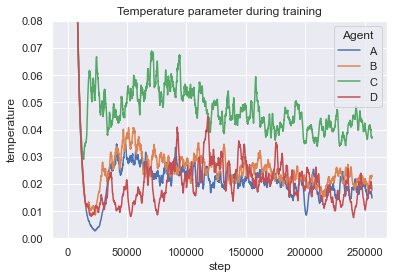

In [17]:
sns.lineplot(data=data, x='step', y='temperature', hue='experiment', ci=None, legend=False)

plt.title('Temperature parameter during training')
plt.legend(labels=['A', 'B', 'C', 'D'], loc='upper right', title='Agent')
plt.ylim(0, 0.08)

plt.savefig('C:\\Users\\Hasegawa\\Desktop\\AIT Note\\Thesis\\proposal draft\\figures\\temperature_result.png', dpi=150)